In [ ]:
# https://d2l.ai/chapter_multilayer-perceptrons/mlp-concise.html
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from google.colab import drive
import os
import shutil 
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# Regression Example With Boston Dataset: Standardized and Larger
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# You can visualize the results with a confusion matrix.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((y_true.shape[0],y_true.shape[0]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')

In [ ]:
drive.mount('/content/drive')
# feel free to edit this cell to work with your local or colab directory
with open('/content/drive/My Drive/ECE 539/ECE 539 Project/result.csv', 'r') as f: 
  df= pd.read_csv(f)
df = df.drop(['Unnamed: 0', 'Date', 'gme', 'amc', 'Time', 'High', 'Low', 'yesterday_open', '2before_open', '3before_open', '4before_open', '5before_open', '6before_open', '7before_open'], axis=1)
df = df.fillna(df.mean(axis=0), axis=0)

Mounted at /content/drive


In [ ]:
arr = pd.DataFrame.to_numpy(df)
X = arr[:,:13]
y = arr[:,13:21]
X = preprocessing.normalize(X)

# features = 1
# X = X.reshape((X.shape[0], X.shape[1], features))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# # partition into training and validation set at 80/20 division
# def larger_model():
# 	# create model
# 	model = RandomForestRegressor(n_estimators=50, oob_score=True)
# 	# Compile model
# 	return model

from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(random_state = 50)

### Grid Search ###
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 5,
              'max_leaf_nodes': None}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
y_predict = np.zeros((y_test.shape[0], y_test.shape[1]))

for i in range(len(y[0])):
  
  # evaluate model with standardized dataset
  # estimators = []
  RF_model = RandomForestRegressor(**parameters)
  # results = cross_val_score(pipeline, X_train, y_train[:,i], cv=kfold)
  RF_model.fit(X_train, y_train[:,i])
  yhat = RF_model.predict(X_test)
  for j in range(len(yhat)):
    y_predict[j][i] = yhat[j] 
  print("MSE :", np.square(np.subtract(y_test[:,i],yhat)).mean())
  print("R2 :", r2_score(yhat,y_test[:,i]))
  # print("(%f): Iteration Larger: %.2f (%.2f) MSE" % (i+1, results.mean(), results.std()))

MSE : 27.38947317013884
R2 : 0.9932677624311437
MSE : 29.281659330885525
R2 : 0.9655185157302104
MSE : 55.55509216990372
R2 : 0.995804088643947
MSE : 71.62775265942152
R2 : 0.994307697328569
MSE : 136.193778773857
R2 : 0.9920628421754678
MSE : 136.80427160271876
R2 : 0.9915108237790486
MSE : 187.52722123451375
R2 : 0.9887310813165258
MSE : 200.23764141364467
R2 : 0.9888139549931474


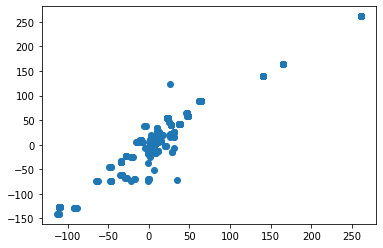

In [ ]:
plt.scatter(y_predict[:,5], y_test[:,5])

In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.
